## Creating a schema for E-Commerce retailer: "r_ecom"

In [6]:
CREATE TABLE IF NOT EXISTS r_ecom(
                                order_date DATE,
                                week_number INTEGER,
                                order_id INTEGER,
                                category VARCHAR (1024),
                                item_type VARCHAR (1024),
                                seller_name VARCHAR (1024),
                                brand VARCHAR (1024),
                                item_title VARCHAR (1024),
                                bar_code BIGINT,
                                quantity_sold INTEGER,
                                margin_perc INTEGER,
                                price REAL,
                                cost REAL
);

""


## Import CSV data through pgAdmin4. Its important that the CSV file is encoded in UTF-8

In [1]:
select *
from r_ecom

,order_date,week_number,order_id,category,item_type,seller_name,brand,item_title,bar_code,quantity_sold,margin_perc,price,cost
0,2013-07-28 00:00:00+00:00,31,3288102,Bags & Shoes,Shoes,cocosstore,COCOS,3351,2724269438678,1,20,50,40.0
1,2013-07-30 00:00:00+00:00,31,3306068,Bags & Shoes,Shoes,cocosstore,COCOS,3353,2724271349252,1,20,50,40.0
2,2013-07-05 00:00:00+00:00,27,3156053,Bags & Shoes,Handbags,cocosstore,COCOS,8908,2724272504018,1,20,100,80.0
3,2013-07-21 00:00:00+00:00,30,3246265,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,Anne Klein Women's 10/9956CMHN Swarovski Cryst...,2724275075270,1,20,352,281.6
4,2013-07-29 00:00:00+00:00,31,3295210,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,Anne Klein Women's 104899BKSB Silver-Tone Blac...,2724275168361,1,20,202,161.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27457,2013-07-14 00:00:00+00:00,29,3205165,Bags & Shoes,Handbags,Fashion,In Love Again,In Love Again Faux Crocodile Leather Shoulder Bag,2724276912345,1,20,100,80.0
27458,2013-07-15 00:00:00+00:00,29,3209552,Bags & Shoes,Handbags,Fashion,In Love Again,In Love Again Faux Crocodile Leather Shoulder Bag,2724276912338,1,20,100,80.0
27459,2013-07-16 00:00:00+00:00,29,3217697,Bags & Shoes,Handbags,Fashion,In Love Again,In Love Again Faux Crocodile Leather Shoulder Bag,2724276912345,1,20,100,80.0
27460,2013-07-17 00:00:00+00:00,29,3223811,Bags & Shoes,Handbags,Fashion,In Love Again,In Love Again Faux Crocodile Leather Shoulder Bag,2724276912376,1,20,100,80.0


## 1. What were the total sales for each category in Week 29?

In [8]:
select  category,
        sum(quantity_sold*price) as total_sales
from r_ecom
where week_number = 29
group by category
order by total_sales desc

,category,total_sales
0,Mobiles & Accessories,853737
1,Computers & Networking,475422
2,Watches & Accessories,395819
3,Health & Beauty,321430
4,Electronics,240463
5,Bags & Shoes,41887
6,Clothing & Accessories,36845
7,Jewelry,125


## 2. Share the sales and margin trends by category over the last 4 weeks basis the total orders, cost and margins.

In [9]:
select  week_number,category,
        sum(quantity_sold) as total_orders,
        round(sum(cost*quantity_sold)) as total_cost,
        round(sum(margin_perc*quantity_sold*price)/100) as margin_$,
        round(sum(quantity_sold*price)) as total_sales
from r_ecom
where week_number != 27
group by 1,2
order by category desc,week_number desc;

,week_number,category,total_orders,total_cost,margin_$,total_sales
0,31,Watches & Accessories,2292,288642,72161,360803
1,30,Watches & Accessories,2330,328111,82028,410139
2,29,Watches & Accessories,2124,316655,79164,395819
3,28,Watches & Accessories,2333,306816,76704,383520
4,31,Mobiles & Accessories,676,738219,82024,820243
5,30,Mobiles & Accessories,825,996737,110749,1107486
6,29,Mobiles & Accessories,707,768363,85374,853737
7,28,Mobiles & Accessories,834,820130,91126,911256
8,31,Jewelry,4,140,35,175
9,30,Jewelry,5,252,63,315


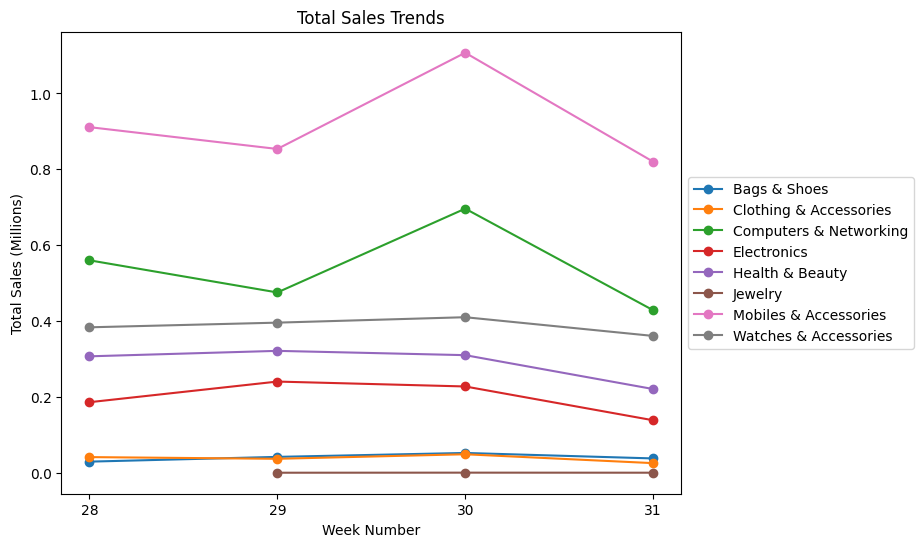

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

for label, df in trends_df.groupby('category'):
    plt.plot(df["week_number"],df["total_sales"]/1e06,'-o',label=df.iloc[0,1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([28,29,30,31])
plt.xlabel("Week Number")
plt.ylabel("Total Sales (Millions)")
plt.title("Total Sales Trends")
plt.show()

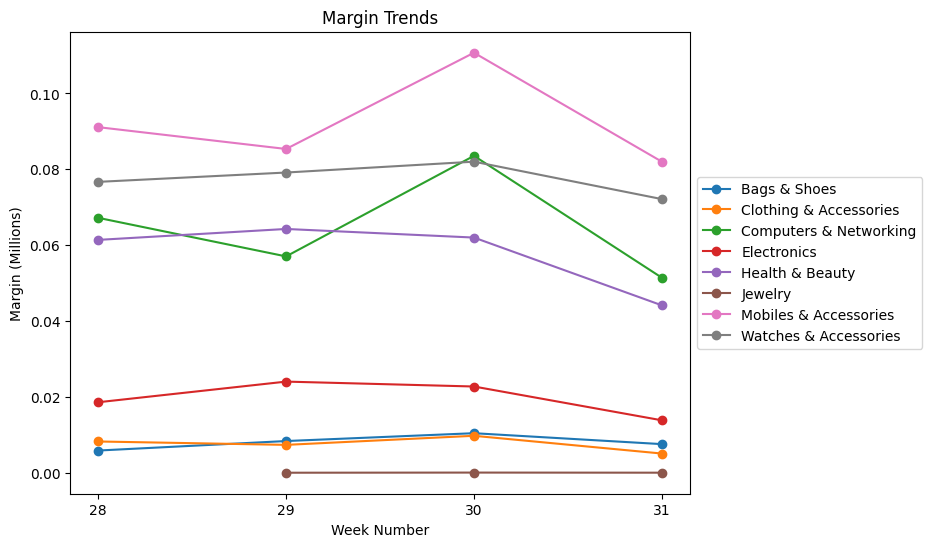

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

for label, df in trends_df.groupby('category'):
    plt.plot(df["week_number"],df["margin_$"]/1e06,'-o',label=df.iloc[0,1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([28,29,30,31])
plt.xlabel("Week Number")
plt.ylabel("Margin (Millions)")
plt.title("Margin Trends")
plt.show()

## 3.1 What were the Top 5 selling individual products (item_title) in terms of  units over the 4 weeks and what were their margin (in % and $)?

In [12]:
-- Top 5 item_title

select item_type,
item_title,
sum(quantity_sold) as units_sold,
concat(max(margin_perc),'%') as margin,
round(sum(margin_perc*quantity_sold*price)/100) as margin_$
from r_ecom
where week_number != 27
group by 1,2
order by 3 desc
limit 5

,item_type,item_title,units_sold,margin,margin_$
0,Perfumes & Fragrances,GUESS PINK FOR WOMEN 75ml,597,20%,13101
1,Perfumes & Fragrances,Calvin Klein CK One for Unisex (Eau de Toilett...,547,20%,18196
2,Perfumes & Fragrances,Cool Water by Davidoff (125ml Eau de Toilette),287,20%,7836
3,Perfumes & Fragrances,Guess by Marciano for Men by Guess (100ml Eau ...,266,20%,5232
4,Mobile Phones,HTC Rhyme (Plum/English),211,10%,15117


## 3.2 What were the Top 5 selling products (item_type) in terms of  units over the 4 weeks and what were their margin (in % and $)?

In [13]:
-- Top 5 item_types

select item_type,
sum(quantity_sold) as units_sold,
concat(max(margin_perc),'%') as margin,
round(sum(margin_perc*quantity_sold*price)/100) as margin_$
from r_ecom
where week_number != 27
group by 1
order by 2 desc
limit 5

,item_type,units_sold,margin,margin_$
0,Watches,9079,20%,310056
1,Perfumes & Fragrances,8561,20%,231867
2,Mobile Phones,3042,10%,369272
3,Laptops & Notebooks,1110,12%,259269
4,Eyewear,946,20%,26075


## 4/5. Which category had the best/worst sales growth over the 4 weeks? 

## a) Weekly Sales Growth

In [14]:
-- Use pivoting to pivot by weekly sales column
create extension if not exists tablefunc;

with pivoted_table as(
select * from crosstab($$
select category,
concat('week_',week_number) as week,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
group by week,category
order by category, week
$$) as ct( category varchar(1024),
          "week_27" float,
          "week_28" float,
          "week_29" float,
          "week_30" float,
          "week_31" float)
)
select category,week_27,week_28,
concat(round(100.0*(week_28-week_27)/week_27),'%') as sales_growth_28,
week_29,
concat(round(100.0*(week_29-week_28)/week_28),'%') as sales_growth_29,
week_30,
concat(round(100.0*(week_30-week_29)/week_29),'%') as sales_growth_30,
week_31,
concat(round(100.0*(week_31-week_30)/week_30),'%') as sales_growth_31
from pivoted_table;

,category,week_27,week_28,sales_growth_28,week_29,sales_growth_29,week_30,sales_growth_30,week_31,sales_growth_31
0,Bags & Shoes,30001,29365,-2%,41887,43%,52216,25%,37824.0,-28%
1,Clothing & Accessories,51529,41299,-20%,36845,-11%,48806,32%,25405.0,-48%
2,Computers & Networking,536316,560166,4%,475422,-15%,696360,46%,428630.0,-38%
3,Electronics,183177,186059,2%,240463,29%,227539,-5%,138445.0,-39%
4,Health & Beauty,191736,307033,60%,321430,5%,310098,-4%,220776.0,-29%
5,Jewelry,180,125,-31%,315,152%,175,-44%,NaN,%
6,Mobiles & Accessories,847405,911256,8%,853737,-6%,1107486,30%,820243.0,-26%
7,Watches & Accessories,358391,383520,7%,395819,3%,410139,4%,360803.0,-12%


## b) Overall Sales Growth

In [15]:
-- Use pivoting to pivot by weekly sales column
create extension if not exists tablefunc;

with pivoted_table as(
select * from crosstab($$
select category,
concat('week_',week_number) as week,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
where week_number != 27
group by week,category
order by category, week
$$) as ct( category varchar(1024),
          "week_28" float,
          "week_29" float,
          "week_30" float,
          "week_31" float)
)
select *,
case when week_31 is not NULL then round(100.0*(week_31-week_28)/week_28)
     else round(100.0*(0-week_28)/week_28)
     end as overall_sales_growth_percent
from pivoted_table
order by 6 desc;

,category,week_28,week_29,week_30,week_31,overall_sales_growth_percent
0,Bags & Shoes,29365,41887,52216,37824.0,29
1,Watches & Accessories,383520,395819,410139,360803.0,-6
2,Mobiles & Accessories,911256,853737,1107486,820243.0,-10
3,Computers & Networking,560166,475422,696360,428630.0,-23
4,Electronics,186059,240463,227539,138445.0,-26
5,Health & Beauty,307033,321430,310098,220776.0,-28
6,Clothing & Accessories,41299,36845,48806,25405.0,-38
7,Jewelry,125,315,175,NaN,-100


## Best and Worst
From the overall sales growth, 
- Only Bags and Shoes had sales growth (comparing week 31 and week 28).
- Every other product lost sales. 
- Jewellery had the highest loss in sales with 0 orders in week 31.

## 6. What was the average order value in Electronics over the 4 weeks? How could this be increased?

In [16]:
select 
week_number,
-- seller_name,item_title,
count (distinct order_id) as total_orders,
round(sum(quantity_sold*price)) as total_sales,
round(sum(quantity_sold*price)/count (distinct order_id)) as avg_order_value
from r_ecom
where week_number != 27
and category = 'Electronics'
group by 1
order by week_number, total_orders desc;

,week_number,total_orders,total_sales,avg_order_value
0,28,129,186059,1442
1,29,161,240463,1494
2,30,196,227539,1161
3,31,127,138445,1090


## Suggestions to increase AOV
- In the dataset given, each order id only contained one item title. There can be multiple quantities of the same item title.
- One way to increase AOV is to allow customers to bunch together different items in a single order which would increase the value of the order, which would drive up the AOV.
- Upsell or cross-sell complementary products, such as accessories or add-ons.
- On top of the previous recommendation, customers can also be offered free delivery if the order value exceeds a minimum order value.
- Set up a customer loyalty program like amazon prime or swiggy one subscriptions.

## 7. Identify the Top 10 selling item types by value and units, and propose 3 ideas to grow sales even more on them.

## 7.1 Top 10 selling item types by value

In [17]:
select 
item_type,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
group by 1
order by total_sales desc
limit 10;

,item_type,total_sales
0,Mobile Phones,4540127
1,Laptops & Notebooks,2696894
2,Watches,1908672
3,Perfumes & Fragrances,1351073
4,Digital Cameras,975683
5,Eyewear,178624
6,Handbags,112544
7,Shoes,74741
8,Dresses,24732
9,Backpacks,4008


## 7.2 Top 10 selling item types by units

In [18]:
select 
item_type,
sum(quantity_sold) as total_units
from r_ecom
group by 1
order by total_units desc
limit 10;

,item_type,total_units
0,Watches,11253
1,Perfumes & Fragrances,9952
2,Mobile Phones,3719
3,Laptops & Notebooks,1374
4,Eyewear,1313
5,Digital Cameras,766
6,Handbags,660
7,Shoes,499
8,Dresses,184
9,Backpacks,53


## Suggestions to grow sales
- Suggest products that pair well with the item in the user’s cart
	- For example - The highest revenue generating product type is mobile phone. Additionally accessories like adapter, USB-cable, Screen Guard, Phone Insurance, back covers, etc should be suggested.
- Bundle lower selling items with higher selling items. As the higher selling items get a higher footfall, they can be diverted to related lower selling items. For example, 
	- Laptops can be paired with suggestions for backpacks.
	- Handbag can be paired with suggestions for dresses & shoes.	
- Easier return and replacement policies combined with a smoother refund process might motivate more customers to buy high value items.

## 8.List the Top 5 and Bottom 5 sellers by value over the 4 weeks, and show their sales by week.

## 8.1 Top 5

In [19]:
select seller_name,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
where week_number!= 27
group by 1
order by total_sales desc 
limit 5;

,seller_name,total_sales
0,dod,5271045
1,absholding,357314
2,DJperfumes,342438
3,Mobile-store,277924
4,lowestprices,255288


## 8.11 Sales of top 5

In [20]:
-- Use pivoting to pivot by weekly sales column
create extension if not exists tablefunc;

with data as(
select * from crosstab($$

with top_5 as (
    select seller_name as s1,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
where week_number!= 27
group by 1
order by total_sales desc 
limit 5
)

select seller_name,concat('week_',week_number) as week,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
where seller_name in (select s1 from top_5)
and week_number != 27
group by 1,2
order by 1,2,3 desc
$$) as ct( 
    seller_name varchar(1024),
    "week_28" float,
    "week_29" float,
    "week_30" float,
    "week_31" float
)
)
select seller_name,week_28,week_29,week_30,
        case when week_31 is NULL then 0
        else week_31
        end as week_31
from data
order by week_28+week_29+week_30+(case when week_31 is NULL then 0
        else week_31
        end) desc;

,seller_name,week_28,week_29,week_30,week_31
0,dod,1327956,1166221,1527303,1249565
1,absholding,86178,77935,104304,88897
2,DJperfumes,66649,96407,112126,67256
3,Mobile-store,125740,81914,43042,27228
4,lowestprices,118495,95234,41559,0


## 8.2 Bottom 5

In [21]:
select seller_name,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
where week_number!= 27
group by 1
order by total_sales 
limit 5;

,seller_name,total_sales
0,harshadachukka,20
1,ousha1973,25
2,olacbtae,32
3,heavy-sahab,36
4,mr_rahatali,39


## 8.21 Sales of bottom 5

In [22]:
-- Use pivoting to pivot by weekly sales column
create extension if not exists tablefunc;

with data as(
select * from crosstab($$

with top_5 as (
    select seller_name as s1,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
where week_number!= 27
group by 1
order by total_sales 
limit 5
)

select seller_name,concat('week_',week_number) as week,
round(sum(quantity_sold*price)) as total_sales
from r_ecom
where seller_name in (select s1 from top_5)
and week_number != 27
group by 1,2
order by 1,2,3 desc
$$) as ct( 
    seller_name varchar(1024),
    "week_28" float,
    "week_29" float,
    "week_30" float,
    "week_31" float
)
)
select seller_name,week_28,week_29,week_30,week_31
from data
order by week_28;

,seller_name,week_28,week_29,week_30,week_31
0,harshadachukka,20,NaN,NaN,NaN
1,ousha1973,25,NaN,NaN,NaN
2,olacbtae,32,NaN,NaN,NaN
3,heavy-sahab,36,NaN,NaN,NaN
4,mr_rahatali,39,NaN,NaN,NaN


## 10. Give 3 months sales projection for top 3 categories with the suggestive actions to achieve the same

In [23]:
select category,round(sum(quantity_sold*price)) as total_sales
from r_ecom
group by 1
order by total_sales desc
limit 3;

,category,total_sales
0,Mobiles & Accessories,4540127
1,Computers & Networking,2696894
2,Watches & Accessories,1908672


## 10.1 Sales of top 3 categories

In [3]:
create extension if not exists tablefunc;

select * from crosstab($$
with top3 as (
select category,round(sum(quantity_sold*price)) as total_sales
from r_ecom
group by 1
order by total_sales desc
limit 3
)

select category,concat('week_',week_number),round(sum(quantity_sold*price)) as total_sales
from r_ecom
where category in (select category from top3)
group by 1,2
order by 1,2
$$)
 as ct( 
    category varchar(1024),
    "week_27" float,
    "week_28" float,
    "week_29" float,
    "week_30" float,
    "week_31" float
)

,category,week_27,week_28,week_29,week_30,week_31
0,Computers & Networking,536316,560166,475422,696360,428630
1,Mobiles & Accessories,847405,911256,853737,1107486,820243
2,Watches & Accessories,358391,383520,395819,410139,360803


# Sales Projections
## The projections were made using FORECAST.LINEAR() in Excel.
## Computers & Networking
![image-2](image-2.png)

## Mobile & Accessories
![image-3](image-3.png)

## Watches & Accessories
![image-4](image-4.png)


# Avenues for further analytics
- Users footfall vs conversion rate
- Major drop-off areas 
- Existing customer complaint handling process and resolution rate
- CAC analysis